# Comparing photometric fluxes and model spectra

In this tutorial, we will compare the photometric fluxes of the brown dwarf companion PZ Tel B with a synthetic spectrum from the ATMO grid.

## Initiating *species*

We start by importing *species*.

In [1]:
from species import SpeciesInit
from species.data.database import Database
from species.read.read_model import ReadModel
from species.plot.plot_spectrum import plot_spectrum
from species.util.fit_util import get_residuals, multi_photometry

And initiating the workflow with the [SpeciesInit](https://species.readthedocs.io/en/latest/species.core.html#species.core.init.SpeciesInit) class. This will create the configuration file and the HDF5 database.

In [2]:
SpeciesInit()

species v0.7.4
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Creating species_config.ini... [DONE]
Configuration settings:
   - Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
   - Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


## Adding model spectra

We create now a [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) object which is used for importing various data into the database.

In [3]:
database = Database()

The spectra of ATMO are downloaded and added to the database with the [add_model](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_model) method of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database). This requires sufficient disk storage in the *data_folder* that is set in the configuration file. The full ATMO grid is downloaded but the `teff_range` parameter can be used to only import a certain $T_\mathrm{eff}$ range into the database.

In [4]:
database.add_model('atmo', teff_range=(2500., 3000.))

100%|████████████████████████████████████████| 445M/445M [00:00<00:00, 438GB/s]
SHA256 hash of downloaded file: f8bde62bf0809c6c5d636cd52d1f2b82457205981095e14ef269d69e46268764
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


Unpacking ATMO model spectra (425 MB)... [DONE]
Please cite Phillips et al. (2020) when using ATMO in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..38P/abstract
Wavelength range (um) = 0.4 - 6000
Spectral resolution = 10000
Teff range (K) = 2500.0 - 3000.0
Adding ATMO model spectra... [DONE]                          
Grid points stored in the database:
   - Teff = [2500. 2600. 2700. 2800. 2900. 3000.]
   - log(g) = [2.5 3.  3.5 4.  4.5 5.  5.5]
Number of grid points per parameter:
   - teff: 6
   - logg: 7
Fix missing grid points with a linear interpolation:
Number of stored grid points: 42
Number of interpolated grid points: 0
Number of missing grid points: 0


## Adding companion data

Next, we add the parallax and magnitudes of PZ Tel B to the database with the `add_companion`` method. This will automatically download the required filter profiles and a flux-calibrated spectrum of Vega. These are used to convert the magnitudes into fluxes.

In [5]:
database.add_companion('PZ Tel B', verbose=False)

Adding filter: Paranal/SPHERE.ZIMPOL_R_PRIM... [DONE]
Adding filter: Paranal/SPHERE.ZIMPOL_I_PRIM... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_H23_3... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_2... [DONE]
Adding filter: Paranal/NACO.J... [DONE]
Adding filter: Paranal/NACO.H... [DONE]
Adding filter: Paranal/NACO.Ks... [DONE]
Adding filter: Paranal/NACO.Lp... [DONE]
Adding filter: Paranal/NACO.NB405... [DONE]
Adding filter: Paranal/NACO.Mp... [DONE]
Adding filter: Gemini/NICI.ED286... [DONE]
Adding filter: Gemini/NIRI.H2S1v2-1-G0220...

 [DONE]


100%|████████████████████████████████████████| 288k/288k [00:00<00:00, 169MB/s]

Adding Vega spectrum... [DONE]
Reference: Bohlin et al. 2014, PASP, 126
URL: https://ui.adsabs.harvard.edu/abs/2014PASP..126..711B/abstract
Adding object: PZ Tel B

 [DONE]


Alternatively, the [add_object](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_object) method of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) can be used for manually adding magnitudes and spectra of an individual object. Before continuing, let's check the content of the database.

In [6]:
database.list_content()

Database content:
- filters: <HDF5 group "/filters" (2 members)>
	- Gemini: <HDF5 group "/filters/Gemini" (2 members)>
		- NICI.ED286: <HDF5 dataset "NICI.ED286": shape (387, 2), type "<f8">
			- det_type: energy
		- NIRI.H2S1v2-1-G0220: <HDF5 dataset "NIRI.H2S1v2-1-G0220": shape (129, 2), type "<f8">
			- det_type: energy
	- Paranal: <HDF5 group "/filters/Paranal" (12 members)>
		- NACO.H: <HDF5 dataset "NACO.H": shape (23, 2), type "<f8">
			- det_type: energy
		- NACO.J: <HDF5 dataset "NACO.J": shape (20, 2), type "<f8">
			- det_type: energy
		- NACO.Ks: <HDF5 dataset "NACO.Ks": shape (27, 2), type "<f8">
			- det_type: energy
		- NACO.Lp: <HDF5 dataset "NACO.Lp": shape (31, 2), type "<f8">
			- det_type: energy
		- NACO.Mp: <HDF5 dataset "NACO.Mp": shape (18, 2), type "<f8">
			- det_type: energy
		- NACO.NB405: <HDF5 dataset "NACO.NB405": shape (67, 2), type "<f8">
			- det_type: energy
		- SPHERE.IRDIS_D_H23_2: <HDF5 dataset "SPHERE.IRDIS_D_H23_2": shape (113, 2), type "<f8">
		

We see the various groups, subgroups, datasets, and attributes that are stored in the HDF5 database.

## Reading model spectra

Model spectra are read from the database by first creating an instance of [ReadModel](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_model.ReadModel). The model name and optionally a wavelength range are provided as arguments.

In [7]:
readmodel = ReadModel('atmo', wavel_range=(0.5, 10.))

Before extracting a spectrum, let's check which parameters are required for the ATMO model spectra.

In [8]:
readmodel.get_parameters()

['teff', 'logg']

And also the parameter boundaries of the grid that is stored in the database.

In [9]:
readmodel.get_bounds()

{'teff': (2500.0, 3000.0), 'logg': (2.5, 5.5)}

The parameters are provided in a dictionary for which we have to make sure that chose values are within the grid boundaries. The radius ($R_\mathrm{J}$) and distance (pc) will scale the emitted spectrum to the observer. Without these values, the spectrum fluxes are provided at the surface of the atmosphere.

In [10]:
model_param = {'teff': 2900., 'logg': 4.5, 'radius': 2.2, 'distance': 47.13}

We now use the [get_model](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_model.ReadModel.get_model) method of [ReadModel](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_model.ReadModel) to linearly interpolate the grid of spectra and store the extracted spectrum in a `ModelBox`. The spectrum is smoothed to a spectral resolution of $R = 100$.

In [11]:
modelbox = readmodel.get_model(model_param, spec_res=100., smooth=True)

## Reading companion data

The photometric data of PZ Tel B are also read from the database and stored in an [ObjectBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ObjectBox).

In [12]:
objectbox = database.get_object(object_name='PZ Tel B')

Getting object: PZ Tel B... [DONE]


## Synthetic photometry for all filters

For comparison, we create synthetic photometry from the extracted ATMO spectrum for all filters of PZ Tel B. The synthetic fluxes are stored in a [SynphotBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.SynphotBox).

In [13]:
synphotbox = multi_photometry(datatype='model',
                              spectrum='atmo',
                              filters=objectbox.filters,
                              parameters=model_param)

Calculating synthetic photometry... [DONE]


## Creating flux residuals

The [get_residuals](https://species.readthedocs.io/en/latest/species.util.html#species.util.phot_util.get_residuals) function is now used to calculate the difference between the observed fluxes and the synthetic fluxes from the model spectrum. The residuals are stored in a [ResidualsBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ResidualsBox).

In [14]:
res_box = get_residuals(datatype='model',
                        spectrum='atmo',
                        parameters=model_param,
                        objectbox=objectbox,
                        inc_phot=True,
                        inc_spec=False)

Calculating synthetic photometry... [DONE]
Calculating residuals... [DONE]
Residuals (sigma):
   - Gemini/NICI.ED286: 0.95
   - Gemini/NIRI.H2S1v2-1-G0220: -0.53
   - Paranal/NACO.H: -1.06
   - Paranal/NACO.J: -0.52
   - Paranal/NACO.Ks: -0.09
   - Paranal/NACO.Lp: -0.31
   - Paranal/NACO.Mp: 3.38
   - Paranal/NACO.NB405: -0.72
   - Paranal/SPHERE.IRDIS_D_H23_2: 0.22
   - Paranal/SPHERE.IRDIS_D_H23_3: -0.36
   - Paranal/SPHERE.IRDIS_D_K12_1: 0.29
   - Paranal/SPHERE.IRDIS_D_K12_2: 0.36
   - Paranal/SPHERE.ZIMPOL_I_PRIM: -8.54
   - Paranal/SPHERE.ZIMPOL_R_PRIM: -4.28
Reduced chi2 = 9.66
Number of degrees of freedom = 11


## Opening Box objects

The [open_box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box.open_box) method can be used to view the content of any [Box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box) object. For example, the [ModelBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ModelBox) contains several attributes, including the wavelengths and fluxes.

In [15]:
modelbox.open_box()

Opening ModelBox...
model = atmo
type = None
wavelength = [ 0.49998877  0.50003831  0.50008785 ...  9.99834109  9.99933175
 10.0003225 ]
flux = [2.08847615e-15 2.09244879e-15 2.09662537e-15 ... 5.81613270e-17
 5.81495742e-17 5.81380225e-17]
parameters = {'teff': 2900.0, 'logg': 4.5, 'radius': 2.2, 'distance': 47.13, 'luminosity': 0.0032568812069009873, 'mass': 61.74898371650208}
quantity = flux
contribution = None
bol_flux = None


Similarly, an [ObjectBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ObjectBox) contains a dictionary with the magnitudes and a dictionary with the fluxes.

In [16]:
objectbox.open_box()

Opening ObjectBox...
name = PZ Tel B
filters = ['Gemini/NICI.ED286', 'Gemini/NIRI.H2S1v2-1-G0220', 'Paranal/NACO.H', 'Paranal/NACO.J', 'Paranal/NACO.Ks', 'Paranal/NACO.Lp', 'Paranal/NACO.Mp', 'Paranal/NACO.NB405', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_K12_1', 'Paranal/SPHERE.IRDIS_D_K12_2', 'Paranal/SPHERE.ZIMPOL_I_PRIM', 'Paranal/SPHERE.ZIMPOL_R_PRIM']
mean_wavel = {'Gemini/NICI.ED286': 1.5841803431418238, 'Gemini/NIRI.H2S1v2-1-G0220': 2.2447142746110718, 'Paranal/NACO.H': 1.6588090664617747, 'Paranal/NACO.J': 1.265099894847529, 'Paranal/NACO.Ks': 2.144954491491888, 'Paranal/NACO.Lp': 3.8050282724280526, 'Paranal/NACO.Mp': 4.780970919324577, 'Paranal/NACO.NB405': 4.055862923806052, 'Paranal/SPHERE.IRDIS_D_H23_2': 1.5863509078883227, 'Paranal/SPHERE.IRDIS_D_H23_3': 1.6661442175885708, 'Paranal/SPHERE.IRDIS_D_K12_1': 2.1038552712775034, 'Paranal/SPHERE.IRDIS_D_K12_2': 2.255172356268582, 'Paranal/SPHERE.ZIMPOL_I_PRIM': 0.7843997176190827,

The attributes in a [Box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box) object can be extracted for further analysis or creating plots. For example, to extract the array with wavelengths from the [ModelBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ModelBox):

In [17]:
modelbox.wavelength

array([ 0.49998877,  0.50003831,  0.50008785, ...,  9.99834109,
        9.99933175, 10.0003225 ])

## Plotting model spectrum and photometric fluxes

Finally, we will combine the model spectrum and the photometric fluxes in a plot with [plot_spectrum](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_spectrum.plot_spectrum). A list with [Box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box) objects is provided as an argument of `boxes`. These are interpreted accordingly by the [plot_spectrum](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_spectrum.plot_spectrum) function. Also a list with filter names can be provided as argument of `filters` to show the filter profiles. The [ResidualsBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ResidualsBox) is provided as arguments of `residuals`. Finally, the optional argument of `plot_kwargs` contains a list with optional dictionaries to tune the visualization of the plotted data. The number of items in the list of `plot_kwargs` should be equal to the number of items in the list of `boxes`. For the [SynphotBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.SynphotBox), we can set the item in `plot_kwargs` to `None` such that the marker design is based on the data from [ObjectBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ObjectBox).

The blue squares are the photometric fluxes of PZ Tel B and the open squares are the synthetic photometry computed from the model spectrum. The residuals are shown relative to the uncertainties on the fluxes.

Plotting spectrum...

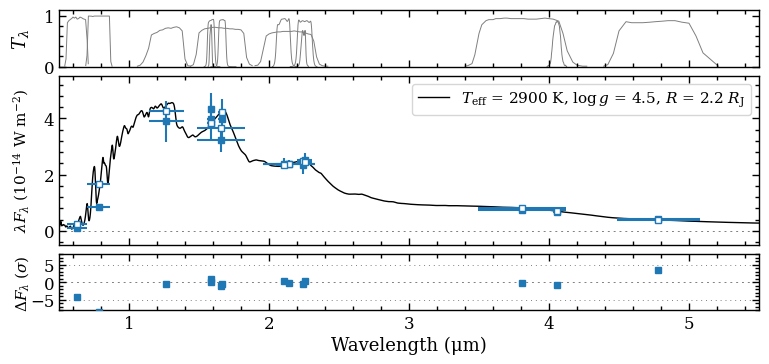

 [DONE]


In [18]:
fig = plot_spectrum(boxes=[modelbox, objectbox, synphotbox],
                    filters=objectbox.filters,
                    residuals=res_box,
                    plot_kwargs=[{'ls': '-', 'lw': 1., 'color': 'black'},
                                 {'Gemini/NICI.ED286': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Gemini/NIRI.H2S1v2-1-G0220': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/NACO.H': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/NACO.J': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/NACO.Ks': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/NACO.Lp': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/NACO.Mp': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/NACO.NB405': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/SPHERE.IRDIS_D_H23_2': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/SPHERE.IRDIS_D_H23_3': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/SPHERE.IRDIS_D_K12_1': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/SPHERE.IRDIS_D_K12_2': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/SPHERE.ZIMPOL_I_PRIM': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'},
                                  'Paranal/SPHERE.ZIMPOL_R_PRIM': {'marker': 's', 'ms': 4., 'color': 'tab:blue', 'ls': 'none'}},
                                  None],
                    xlim=(0.5, 5.5),
                    ylim=(-5e-15, 5.5e-14),
                    ylim_res=(-8, 8),
                    scale=('linear', 'linear'),
                    offset=(-0.45, -0.04),
                    legend={'loc': 'upper right', 'fontsize': 11.},
                    figsize=(7., 3.),
                    quantity='flux',
                    output=None)

The [plot_spectrum](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_spectrum.plot_spectrum) function returned the [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) object of the plot. The functionalities of [Matplotlib](https://matplotlib.org/stable/index.html) can be used for further customization of the plot. For example, the axes of the plot are stored at the `axes` attribute of `Figure`.

In [19]:
fig.axes

[<Axes: ylabel='$\\lambda$$F_\\lambda$ (10$^{-14}$ W m$^{-2}$)'>,
 <Axes: ylabel='$T_\\lambda$'>,
 <Axes: xlabel='Wavelength (μm)', ylabel='$\\Delta$$F_\\lambda$ ($\\sigma$)'>]